In [ ]:
!pip install Sastrawi
!pip install swifter
import pandas as pd
import numpy as np
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn import svm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=da884bd8bb3f5434e7db0a8186248836d3fe9c83d77cb54b5b30a4ea13b48ad9
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


# import dataset

In [ ]:
#jangan lupa kolom content di ganti Ulasan dan kolom Label di ganti Sentimen
ulasan = pd.read_csv('datasetbaru.csv')
ulasan


,No,Username,Score,At,Ulasan,Sentimen
0,1,Hapix Putra,5,Tue 31 Jan 2023 12:45:23 GMT,oo di,positive
1,2,Grace Cipto,5,Tue 31 Jan 2023 04:52:03 GMT,bagus sih tapi tingkatkan lagi,positive
2,3,Ema Akmaliah,5,Mon 30 Jan 2023 22:52:38 GMT,lebih mudah lebih cepat dlm pelayanan,positive
3,4,Prasetyo Utomo,5,Mon 30 Jan 2023 13:00:54 GMT,pilihannya keren,positive
4,5,Bayu Iryanto,5,Mon 30 Jan 2023 09:38:02 GMT,terbaek,positive
...,...,...,...,...,...,...
976,996,Yebee Glory christiant,5,Fri 14 Oct 2022 09:13:09 GMT,mantap cepat dan terpercaya,positive
977,997,Danny Purba,5,Thu 13 Oct 2022 18:50:40 GMT,aplikasi sangat membantu pembelian tiket,neutral
978,998,Nabil Syujazaidan,4,Thu 13 Oct 2022 16:51:45 GMT,jam brp sekarang,neutral
979,999,dewa pandhu,5,Thu 13 Oct 2022 15:36:20 GMT,memudahkan pemesanan tiket bioskop,positive


In [ ]:
ulasan[['Username', 'Ulasan', 'At']]

,Username,Ulasan,At
0,Hapix Putra,oo di,Tue 31 Jan 2023 12:45:23 GMT
1,Grace Cipto,bagus sih tapi tingkatkan lagi,Tue 31 Jan 2023 04:52:03 GMT
2,Ema Akmaliah,lebih mudah lebih cepat dlm pelayanan,Mon 30 Jan 2023 22:52:38 GMT
3,Prasetyo Utomo,pilihannya keren,Mon 30 Jan 2023 13:00:54 GMT
4,Bayu Iryanto,terbaek,Mon 30 Jan 2023 09:38:02 GMT
...,...,...,...
976,Yebee Glory christiant,mantap cepat dan terpercaya,Fri 14 Oct 2022 09:13:09 GMT
977,Danny Purba,aplikasi sangat membantu pembelian tiket,Thu 13 Oct 2022 18:50:40 GMT
978,Nabil Syujazaidan,jam brp sekarang,Thu 13 Oct 2022 16:51:45 GMT
979,dewa pandhu,memudahkan pemesanan tiket bioskop,Thu 13 Oct 2022 15:36:20 GMT


In [ ]:
ulasan['Sentimen'].value_counts()

positive    643
negative    189
neutral     149
Name: Sentimen, dtype: int64

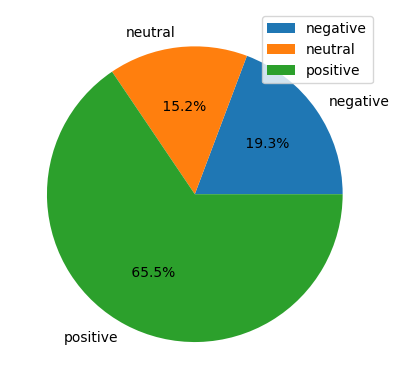

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['negative' , 'neutral', 'positive']
plt.pie(ulasan.groupby('Sentimen')['Sentimen'].count(), autopct=" %.1f%% " ,labels=labels)
plt.legend()
plt.show()

# case folding

In [ ]:
def casefoldingText(ulasan):
  ulasan = ulasan.lower()
  return ulasan
ulasan['CaseFolding']= ulasan['Ulasan'].apply(casefoldingText)

NameError: ignored

In [ ]:
ulasan[['Ulasan','CaseFolding']].to_csv('casefolding.csv',index=False)

# Cleansing

In [ ]:
def cleaningulasan(ulasan):
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan
ulasan['Cleaning']= ulasan['CaseFolding'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
ulasan['HapusEmoji']= ulasan['Cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)
ulasan['Cleansing']= ulasan['HapusEmoji'].apply(replaceTOM)
ulasan[['CaseFolding','Cleansing']].to_csv('cleansing.csv',index=False)

# tokenizing

In [ ]:
nltk.download('punkt')
def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan
ulasan['Tokenizing']= ulasan['Cleansing'].apply(tokenizingText)
ulasan[['CaseFolding','Tokenizing']].to_csv('tokenizing.csv',index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
ulasan[['CaseFolding','Tokenizing']]

,CaseFolding,Tokenizing
0,oo di,"[oo, di]"
1,bagus sih tapi tingkatkan lagi,"[bagus, sih, tapi, tingkatkan, lagi]"
2,lebih mudah lebih cepat dlm pelayanan,"[lebih, mudah, lebih, cepat, dlm, pelayanan]"
3,pilihannya keren,"[pilihannya, keren]"
4,terbaek,[terbaek]
...,...,...
976,mantap cepat dan terpercaya,"[mantap, cepat, dan, terpercaya]"
977,aplikasi sangat membantu pembelian tiket,"[aplikasi, sangat, membantu, pembelian, tiket]"
978,jam brp sekarang,"[jam, brp, sekarang]"
979,memudahkan pemesanan tiket bioskop,"[memudahkan, pemesanan, tiket, bioskop]"


# normalizing

In [ ]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
        content.append(filterSlang.lower())
    ulasan = content
    return ulasan

ulasan['Formalisasi'] = ulasan['Tokenizing'].apply(convertToSlangword)
ulasan[['Tokenizing','Formalisasi']]
ulasan[['Tokenizing','Formalisasi']].to_csv('normalizing.csv',index=False)

# stopword removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

daftar_stopword = stopwords.words('indonesian')
# ---------------------------- manualy add stopword  ------------------------------------

# append additional stopword
daftar_stopword.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 'bikin',
                       'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh',
                       'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan',
                       'loh', 'rt', '&amp', 'yah'])
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
daftar_stopword.extend(txt_stopword["stopwords"] [0].split(' '))

# convert list to dictionary
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
 return [word for word in words if word not in daftar_stopword]

ulasan['Stopword Removal'] = ulasan['Formalisasi'].apply(stopwordText)
ulasan[['Formalisasi','Stopword Removal']].to_csv('stopword.csv',index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in ulasan['Stopword Removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")

def stemmingText(document):
    return [term_dict[term] for term in document]

ulasan['Stemming_list'] = ulasan['Stopword Removal'].swifter.apply(stemmingText)

#merubah list ke str
ulasan['Stemming'] = ulasan['Stemming_list'].apply(' '.join)

#menampilkan data hasil stemming
ulasan[['Ulasan','Stemming']].to_csv('stemming.csv',index=False)

1205
------------------------
buru : buru
{'oo': 'oo', 'bagus': 'bagus', 'tingkatkan': 'tingkat', 'mudah': 'mudah', 'cepat': 'cepat', 'dlm': 'dlm', 'pelayanan': 'layan', 'pilihannya': 'pilih', 'keren': 'keren', 'terbaek': 'terbaek', 'diskonn': 'diskonn', 'app': 'app', 'dibuka': 'buka', 'terbaru': 'baru', 'stuck': 'stuck', 'logo': 'logo', 'tix': 'tix', 'data': 'data', 'mesti': 'mesti', 'gimnain': 'gimnain', 'aplikasi': 'aplikasi', 'cuman': 'cuman', 'poin': 'poin', 'sistem': 'sistem', 'hangus': 'hangus', 'terpakai': 'pakai', 'kadaluwarsa': 'kadaluwarsa', 'babi': 'babi', 'login': 'login', 'susaah': 'susaah', 'mantap': 'mantap', 'suka': 'suka', 'terima': 'terima', 'kasih': 'kasih', 'baguuss': 'baguuss', 'banget': 'banget', 'sederhana': 'sederhana', 'ngumpulin': 'ngumpulin', 'point': 'point', 'gunakanujungujung': 'gunakanujungujung', 'blas': 'blas', 'males': 'males', 'pakai': 'pakai', 'nyamending': 'nyamending', 'sebelah': 'belah', 'gratis': 'gratis', 'iniudah': 'iniudah', 'admint': 'admint

Pandas Apply:   0%|          | 0/981 [00:00<?, ?it/s]

In [ ]:
ulasan.to_csv('data_bersih.csv',index=False)

# pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = ulasan['Stemming']
Y = ulasan['Sentimen']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20)

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)


# Create CountVectorizer instance
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X)

# Create TfidfTransformer instance
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

# Create TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_vectorized = tfidf_vectorizer.fit_transform(X)

# mengambil kata asli from CountVectorizer or TfidfVectorizer
feature_names = count_vectorizer.get_feature_names_out()  # or tfidf_vectorizer.get_feature_names()

# Create a dictionary to store the results
results = {"Ulasan": [], "Term": [], "TF": [], "IDF": [], "TF-IDF": []}

# Loop over the documents
for i in range(len(X)):
    # Add the document to the results dictionary
    results["Ulasan"].extend([f" ulasan{i+1}"] * len(feature_names))
    # Add the feature names to the results dictionary
    results["Term"].extend(feature_names)
    # Calculate the TF, IDF, and TF-IDF for each feature in the document
    for j, feature in enumerate(feature_names):
        tf = X_count[i, j]
        idf = tfidf_transformer.idf_[j]  # or X_tfidf_vectorized.idf_[j]
        tf_idf_score = X_tfidf[i, j]  # or X_tfidf_vectorized[i, j]
        # Add the results to the dictionary
        results["TF"].append(tf)
        results["IDF"].append(idf)
        results["TF-IDF"].append(tf_idf_score)
# Convert the results dictionary to a Pandas dataframe
df = pd.DataFrame(results)


# Save the results to a CSV file
df.to_csv("tf_idf_results.csv", index=False)

#filter nilai term
newdf = df[(df.TF != 0 )]

# Save the results to a CSV file
newdf.to_csv("hasil TF IDF.csv", index=False)

[2 2 0 0 2 2 2 2 0 2 0 2 0 2 1 2 2 2 0 2 1 2 0 0 0 2 2 1 2 2 2 0 0 2 2 2 2
 1 0 2 2 1 1 1 1 2 1 2 1 2 0 1 2 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 0 0
 0 0 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 1 2 0 1 0 2 2 2 2 1 0 1 2 1 2 0 2 2 2 2
 2 2 0 2 2 2 0 0 1 2 2 2 2 2 0 2 0 1 0 2 2 1 1 2 0 2 2 0 2 2 2 1 0 2 0 2 2
 2 2 2 2 2 1 2 0 2 2 0 0 2 0 2 2 1 2 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 1 2 0 2 1 2 2 2 2 2 2 0 2 0 2 2 2 2 1 0 2 2 2 2 2 0 2 1 0
 0 0 0 1 2 2 0 2 2 1 2 1 2 2 0 2 2 2 2 2 2 2 2 2 0 2 1 2 2 1 2 0 2 0 2 2 2
 0 2 2 0 1 2 0 2 2 2 0 2 0 1 2 0 2 1 2 2 2 2 1 2 2 2 0 2 0 2 2 1 2 2 2 0 2
 2 2 0 2 2 2 2 2 2 1 2 0 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 1 2 0 2 2
 2 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 0 2 2 2 2 2 2 2 1 2 0 0
 2 2 2 2 0 1 1 1 2 1 0 2 2 2 2 0 1 2 0 1 2 2 2 2 1 0 0 2 2 0 2 2 2 2 2 1 2
 2 2 2 0 0 2 2 2 2 0 1 0 0 2 0 1 2 2 2 2 1 0 2 2 1 2 2 0 2 2 2 2 2 2 2 1 2
 2 2 2 0 1 0 1 2 2 2 2 2 0 1 1 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2 1 2
 2 2 2 2 0 1 2 1 2 2 2 2 

knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# Mengaktifkan fungsi klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=5)
# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(x_train, y_train)
# Menentukan hasil prediksi dari x_test
y_pred = klasifikasi.predict(x_test)
y_pred
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(x_test)
print(classification_report(y_test, y_pred))

#https://medium.com/@16611130/klasifikasi-menggunakan-metode-knn-k-nearest-neighbor-dalam-python-a40e79a74101


              precision    recall  f1-score   support

           0       0.61      0.66      0.63        35
           1       0.24      0.18      0.21        38
           2       0.82      0.85      0.83       124

    accuracy                           0.69       197
   macro avg       0.55      0.57      0.56       197
weighted avg       0.67      0.69      0.68       197



In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Membuat dataframe kosong untuk menyimpan hasil
results = pd.DataFrame(columns=['K', 'Akurasi', 'Presisi', 'Recall'])
# Nilai k yang diinginkan
k_values = [3,5,7,9,10]

# Loop melalui nilai k yang diinginkan
for k in k_values:

    # Melatih model KNN dengan nilai k
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)

    # Memprediksi label pada data uji
    y_pred = classifier.predict(x_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil ke dalam dataframe
    results = results.append({'K': k, 'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall}, ignore_index=True)

# Menampilkan tabel hasil
print(results)
results.to_csv('pengujianK_KNN.csv',index=False)

      K   Akurasi   Presisi    Recall
0   3.0  0.690355  0.651617  0.690355
1   5.0  0.690355  0.667332  0.690355
2   7.0  0.685279  0.668500  0.685279
3   9.0  0.695431  0.684897  0.695431
4  10.0  0.690355  0.690312  0.690355


# smote

In [ ]:
x_smote =vectorizer.fit_transform(ulasan['Stemming'])
y_smote =ulasan['Sentimen']

from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Dataset sebelum SMOTE : {Counter(Y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_smote, y_smote)

print(f'Dataset sesudah SMOTE : {Counter(y_res)}')

Dataset sebelum SMOTE : Counter({'positive': 643, 'negative': 189, 'neutral': 149})
Dataset sesudah SMOTE : Counter({'positive': 643, 'negative': 643, 'neutral': 643})


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.20)

In [ ]:
df = pd.DataFrame(X_res)
df.rename(columns={0:'term'}, inplace=True)
df['sentimen'] = y_res
# mengembalikan kalimat asli dari tfidf
feature_names = vectorizer.get_feature_names_out()
kalimat_asli = []
for index, row in df.iterrows():
    vektor_ulasan = X_res[index]
    kata_kunci = [feature_names[i] for i in vektor_ulasan.indices]
    kalimat_asli.append(' '.join(kata_kunci))

# tambahkan kolom baru dengan kalimat asli ke dalam data frame
df['kalimat_asli'] = kalimat_asli
df.to_csv('data_smote.csv', index=False)
#mengambil data sintetik
df_sintetik = df.iloc[1000:]
#menyimpan dalam bentuk csv
df_sintetik.to_csv('data_sintetik.csv', index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# Mengaktifkan fungsi klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=10)
# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(X_train, Y_train)
# Menentukan hasil prediksi dari x_test
y_pred = klasifikasi.predict(X_test)
y_pred
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(X_test)
print(classification_report(Y_test, y_pred))

#https://medium.com/@16611130/klasifikasi-menggunakan-metode-knn-k-nearest-neighbor-dalam-python-a40e79a74101


              precision    recall  f1-score   support

    negative       0.79      0.87      0.83       121
     neutral       0.77      0.95      0.85       127
    positive       1.00      0.70      0.82       138

    accuracy                           0.83       386
   macro avg       0.85      0.84      0.83       386
weighted avg       0.86      0.83      0.83       386



In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Membuat dataframe kosong untuk menyimpan hasil
results = pd.DataFrame(columns=['K', 'Akurasi', 'Presisi', 'Recall'])
# Nilai k yang diinginkan
k_values = [3,5,7,9,10]

# Loop melalui nilai k yang diinginkan
for k in k_values:

    # Melatih model KNN dengan nilai k
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train)

    # Memprediksi label pada data uji
    y_pred = classifier.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')

    # Menyimpan hasil ke dalam dataframe
    results = results.append({'K': k, 'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall}, ignore_index=True)

# Menampilkan tabel hasil
print(results)
results.to_csv('pengujian_nilaik.csv',index=False)

      K   Akurasi   Presisi    Recall
0   3.0  0.880829  0.894776  0.880829
1   5.0  0.839378  0.863081  0.839378
2   7.0  0.849741  0.868161  0.849741
3   9.0  0.841969  0.863122  0.841969
4  10.0  0.834197  0.858563  0.834197


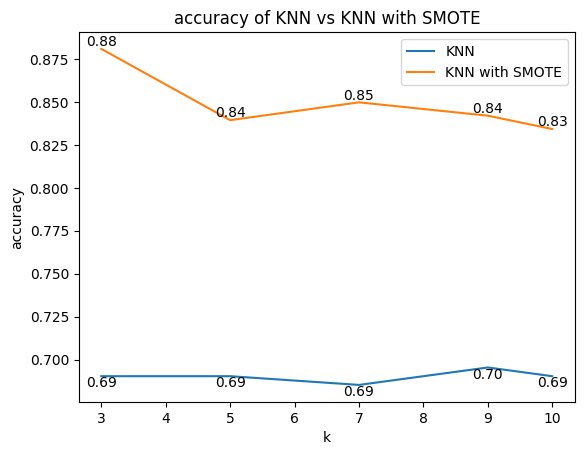

In [ ]:
k_values = [3,5,7,9,10]
# Initialize lists to store accuracy scores
knn_scores = []
smote_scores = []

# Iterate through different k values
for k in k_values:
    # KNN without SMOTE
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test, y_pred_knn))

    # KNN with SMOTE
    knn_smote = KNeighborsClassifier(n_neighbors=k)
    knn_smote.fit(X_train, Y_train)
    y_pred_smote = knn_smote.predict(X_test)
    smote_scores.append(accuracy_score(Y_test, y_pred_smote))

# Plot the recall scores
plt.plot(k_values, knn_scores, label='KNN')
plt.plot(k_values, smote_scores, label='KNN with SMOTE')

# Menampilkan titik nilai pada plot
for i, j in zip(k_values, smote_scores):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

for i, j in zip(k_values, knn_scores):
    plt.text(i, j, f'{j:.2f}', ha='center', va='top')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy of KNN vs KNN with SMOTE')
plt.legend()
plt.savefig('accuracy.png')
plt.show()

# KNN+SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# Mengaktifkan fungsi klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=10)
# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(X_train, Y_train)
# Menentukan hasil prediksi dari x_test
y_predknn = klasifikasi.predict(X_test)
y_predknn
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(X_test)
print(classification_report(Y_test, y_predknn))

#https://medium.com/@16611130/klasifikasi-menggunakan-metode-knn-k-nearest-neighbor-dalam-python-a40e79a74101


              precision    recall  f1-score   support

    negative       0.79      0.87      0.83       121
     neutral       0.77      0.95      0.85       127
    positive       1.00      0.70      0.82       138

    accuracy                           0.83       386
   macro avg       0.85      0.84      0.83       386
weighted avg       0.86      0.83      0.83       386



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_smote =vectorizer.fit_transform(ulasan['Stemming'])
y_smote =ulasan['Sentimen']

# Menguji nilai n_sample
n_sample_values = [1, 3, 5, 7, 9]

for n in n_sample_values:
    print(f"\nMenggunakan n_sample = {n}")
    smote = SMOTE(sampling_strategy=n, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(x_smote, y_smote)


    # Melatih model
    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)

    # Memprediksi data uji
    y_pred = model.predict(X_test)

    # Menampilkan laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))



Menggunakan n_sample = 1


ValueError: ignored